This file is used to train an autogluon model and save it to predictor.ag .

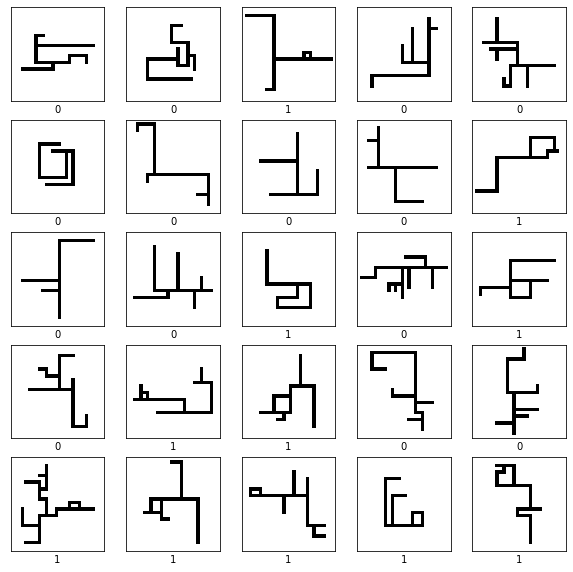

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cycle_dataset = np.load('cycle_dataset.npz')
train_images = cycle_dataset['train_images']
train_labels = cycle_dataset['train_labels']
test_images = cycle_dataset['test_images']
test_labels = cycle_dataset['test_labels']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [3]:
import os
os.makedirs('train', exist_ok=True)
os.makedirs('test', exist_ok=True)

In [4]:
for i in range(60000):
    plt.imsave(f'train/{i}.png', train_images[i])
for i in range(10000):
    plt.imsave(f'test/{i}.png', test_images[i])

In [4]:
import pandas as pd
df = pd.DataFrame({'image': ['train/' + str(i) + '.png' for i in range(len(train_labels))], 'label': train_labels})

In [5]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

2022-04-11 20:58:49.709835: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [6]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio

In [13]:
predictor.fit(df) 

`time_limit=auto` set to `time_limit=7200`.
Converting raw DataFrame to ImageDataset...
Detected 2 unique classes: [0, 1]
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Randomly split train_data into train[54000]/validation[6000] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.train.batch_size 32 != 16
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_patience -1 != 10
root.train.epochs    200 != 15
root.img_cls.model   resnet101 != resnet50
root.misc.num_workers 4 != 48
root.misc.seed       42 != 71
}
Saved config to /root/71f7b8a0/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not en

In [ ]:
predictor.save('predictor.ag')